In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
import string 
import spacy 
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [78]:
musk = pd.read_csv('Elon_musk.csv',
                   encoding='latin',
                   error_bad_lines = False)
musk

Unnamed: 0                                               Text
0              1                             @kunalb11 Im an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1994        1995  @flcnhvy True, it sounds so surreal, but the n...
1995        1996  @PPathole Make sure to read ur terms &amp; con...
1996        1997                @TeslaGong @PPathole Samwise Gamgee
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998        1999                          Progress update August 28

[1999 rows x 2 columns]

In [79]:
musk=musk['Text']
musk

0                                  @kunalb11 Im an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [80]:
musk = [y.strip() for y in musk]
musk

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [81]:
text = ' '.join(musk)
text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [82]:
no_punc_text = text.translate(str.maketrans("\x92", "'", string.punctuation)) 
no_punc_text

"kunalb11 I'm an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It's getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewalletorg

In [83]:
from nltk.tokenize import word_tokenize

text_tokens = word_tokenize(no_punc_text)
text_tokens

['kunalb11',
 'I',
 "'m",
 'an',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'is',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2oj',
 'Frodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'httpstcozGxJFDzzrM',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'GiveDirectly',
 'Just',
 'sent',
 'some',
 'Just',
 'agree',
 'to',
 'do',

In [84]:
text_tokens[0:72]

['kunalb11',
 'I',
 "'m",
 'an',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'is',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2oj',
 'Frodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'httpstcozGxJFDzzrM',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed']

In [85]:
len(text_tokens)


21373

In [86]:
from nltk.corpus import stopwords


In [87]:
my_stop_words = stopwords.words('english')
my_stop_words


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [88]:
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:65])

['kunalb11', 'I', "'m", 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'httpstcozGxJFDzzrM', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'GiveDirectly', 'Just', 'sent', 'Just']


In [89]:
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:45])


['kunalb11', 'i', "'m", 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy']


In [90]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['kunalb11', 'i', "'m", 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'would']


In [91]:
nlp = spacy.load('en_core_web_sm')

In [92]:
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

kunalb11 I 'm alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought


In [93]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:22])

['kunalb11', 'I', "'", 'm', 'alien', 'IDAACarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'Doge', 'underestimate', 'teslacn', 'Congratulations']


### Feature Extraction

In [94]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [95]:
pd.DataFrame.from_records([vectorizer.vocabulary_])


kunalb11  alien  idaacarmack   ray  trace  cyberpunk   hdr  nextlevel  \
0      2694    231         2432  3616   4493        959  1669       3150   

   have   try  ...  dire  priority  surreal  propaganda  social  \
0  1664  4528  ...  1075      3505     4248        3541    4031   

   httpstcowjrzibkh1h  click  samwise  gamgee  altho  
0                2324    773     3816    1525    247  

[1 rows x 4965 columns]

In [96]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T


0
kunalb11            2694
alien                231
idaacarmack         2432
ray                 3616
trace               4493
...                  ...
httpstcowjrzibkh1h  2324
click                773
samwise             3816
gamgee              1525
altho                247

[4965 rows x 1 columns]

In [97]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(30)


0
ðogecoin         4964
zzcool           4963
zwiebelbach      4962
zubinanary       4961
zshauladventure  4960
zone             4959
zon              4958
zogfotpik        4957
zip2             4956
zikryzamir       4955
zero             4954
zenit            4953
zeitmas          4952
zealand          4951
zainraz4         4950
yup              4949
ystijd           4948
youyanggu        4947
yourfavgas       4946
youranonnews     4945
youranonnew      4944
your             4943
young            4942
younesh1989      4941
you              4940
york             4939
yolt             4938
yoda             4937
yo               4936
yet              4935

In [98]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=True).head(25)


0
005             0
10              1
100             2
1000            3
10000           4
107             5
10x             6
11              7
112             8
11thhour        9
12             10
122            11
13             12
130pm          13
13arm13arm     14
13ericralph31  15
14             16
140pm          17
149watt        18
14yearold      19
15             20
150            21
155            22
16             23
162            24

In [99]:
print(vectorizer.vocabulary_)


{'kunalb11': 2694, 'alien': 231, 'idaacarmack': 2432, 'ray': 3616, 'trace': 4493, 'cyberpunk': 959, 'hdr': 1669, 'nextlevel': 3150, 'have': 1664, 'try': 4528, 'joerogan': 2614, 'spotify': 4111, 'great': 1603, 'interview': 2543, 'gtera27': 1622, 'doge': 1110, 'underestimate': 4661, 'teslacn': 4338, 'congratulations': 855, 'tesla': 4332, 'china': 739, 'amazing': 257, 'execution': 1320, 'last': 2714, 'year': 4932, 'now': 3190, 'next': 3149, 'even': 1292, 'happy': 1651, 'new': 3146, 'ox': 3308, 'httpstco9wfkmyu2oj': 1859, 'frodo': 1489, 'underdoge': 4660, 'all': 234, 'thought': 4417, 'would': 4907, 'fail': 1356, 'himself': 1715, 'httpstcozgxjfdzzrm': 2392, 'owensparks': 3305, 'flcnhvy': 1430, 'anonyx10': 286, 'haha': 1636, 'thanks': 4376, 'indeed': 2481, 'tweets': 4551, 'definitely': 1014, 'represent': 3699, 'realworld': 3641, 'time': 4436, 'allocation': 236, 'the': 4383, 'entertaining': 1248, 'outcome': 3285, 'likely': 2775, 'givedirectly': 1574, 'just': 2641, 'send': 3884, 'agree': 200, 

In [100]:
print(vectorizer.get_feature_names_out()[50:100])


['23' '230' '24' '240am' '247teslanew' '25' '250' '250kw' '25d'
 '25gunsteslacom' '25k' '25th' '28' '28delayslater' '28th' '29' '2k' '2nd'
 '2v' '30' '300' '301' '304' '304l' '31' '33' '330' '360' '37' '3800'
 '394' '39a' '3d' '3rd' '40' '400' '42' '420' '4227' '430' '43rd' '445pm'
 '448' '4530000' '45thspacewe' '4680' '479000' '48' '4d' '4th']


In [101]:
print(X.toarray()[50:100])


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [102]:
print(X.toarray().shape)


(16023, 4965)


### bigrams and trigram can be included here

In [103]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',
                                         ngram_range=(1,4),
                                         max_features = 100)

bow_matrix_ngram = vectorizer_ngram_range.fit_transform(musk)
bow_matrix_ngram

<1999x100 sparse matrix of type '<class 'numpy.int64'>'
	with 9618 stored elements in Compressed Sparse Row format>

In [104]:
print(vectorizer_ngram_range.get_feature_names_out())


['0001f923' '0001f923 0001f923' 'about' 'all' 'also' 'amp' 'an' 'and'
 'are' 'as' 'at' 'be' 'but' 'by' 'can' 'cleantechnica' 'co' 'do' 'dragon'
 'erdayastronaut' 'first' 'flcnhvy' 'for' 'from' 'good' 'great' 'haha'
 'has' 'have' 'he' 'high' 'https' 'https co' 'id_aa_carmack' 'if' 'in'
 'in the' 'is' 'it' 'just' 'kristennetten' 'launch' 'like' 'make'
 'marcushousegame' 'more' 'most' 'much' 'my' 'nasa' 'nasaspaceflight'
 'need' 'new' 'no' 'not' 'of' 'of the' 'on' 'one' 'or' 'our' 'out'
 'people' 'ppathole' 'probably' 'rationaletienne' 're' 'rt' 'rt spacex'
 'should' 'so' 'some' 'spacex' 'starship' 'sure' 'tesla' 'teslaownerssv'
 'teslarati' 'than' 'that' 'the' 'there' 'they' 'this' 'this is' 'to'
 'too' 'true' 'was' 'we' 'what' 'wholemarsblog' 'will' 'will be' 'with'
 'would' 'yeah' 'year' 'yes' 'you']


In [105]:
print(bow_matrix_ngram.toarray())


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_n_gram_max_features = TfidfVectorizer(analyzer='word',
                                                 ngram_range=(1, 4),
                                                 max_features=100)

tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_features.fit_transform(musk)
print(vectorizer_n_gram_max_features.get_feature_names_out())


['0001f923' '0001f923 0001f923' 'about' 'all' 'also' 'amp' 'an' 'and'
 'are' 'as' 'at' 'be' 'but' 'by' 'can' 'cleantechnica' 'co' 'do' 'dragon'
 'erdayastronaut' 'first' 'flcnhvy' 'for' 'from' 'good' 'great' 'haha'
 'has' 'have' 'he' 'high' 'https' 'https co' 'id_aa_carmack' 'if' 'in'
 'in the' 'is' 'it' 'just' 'kristennetten' 'launch' 'like' 'make'
 'marcushousegame' 'more' 'most' 'much' 'my' 'nasa' 'nasaspaceflight'
 'need' 'new' 'no' 'not' 'of' 'of the' 'on' 'one' 'or' 'our' 'out'
 'people' 'ppathole' 'probably' 'rationaletienne' 're' 'rt' 'rt spacex'
 'should' 'so' 'some' 'spacex' 'starship' 'sure' 'tesla' 'teslaownerssv'
 'teslarati' 'than' 'that' 'the' 'there' 'they' 'this' 'this is' 'to'
 'too' 'true' 'was' 'we' 'what' 'wholemarsblog' 'will' 'will be' 'with'
 'would' 'yeah' 'year' 'yes' 'you']


In [107]:
print(tf_idf_matrix_n_gram_max_features.toarray())


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.38777203]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [108]:
def plot_cloud(wordcloud):
    
    
    plt.figure(figsize=(60, 40))    # Set figure size

    
    plt.imshow(wordcloud)           # Display image
    
    
    plt.axis("off")                 # No axis details

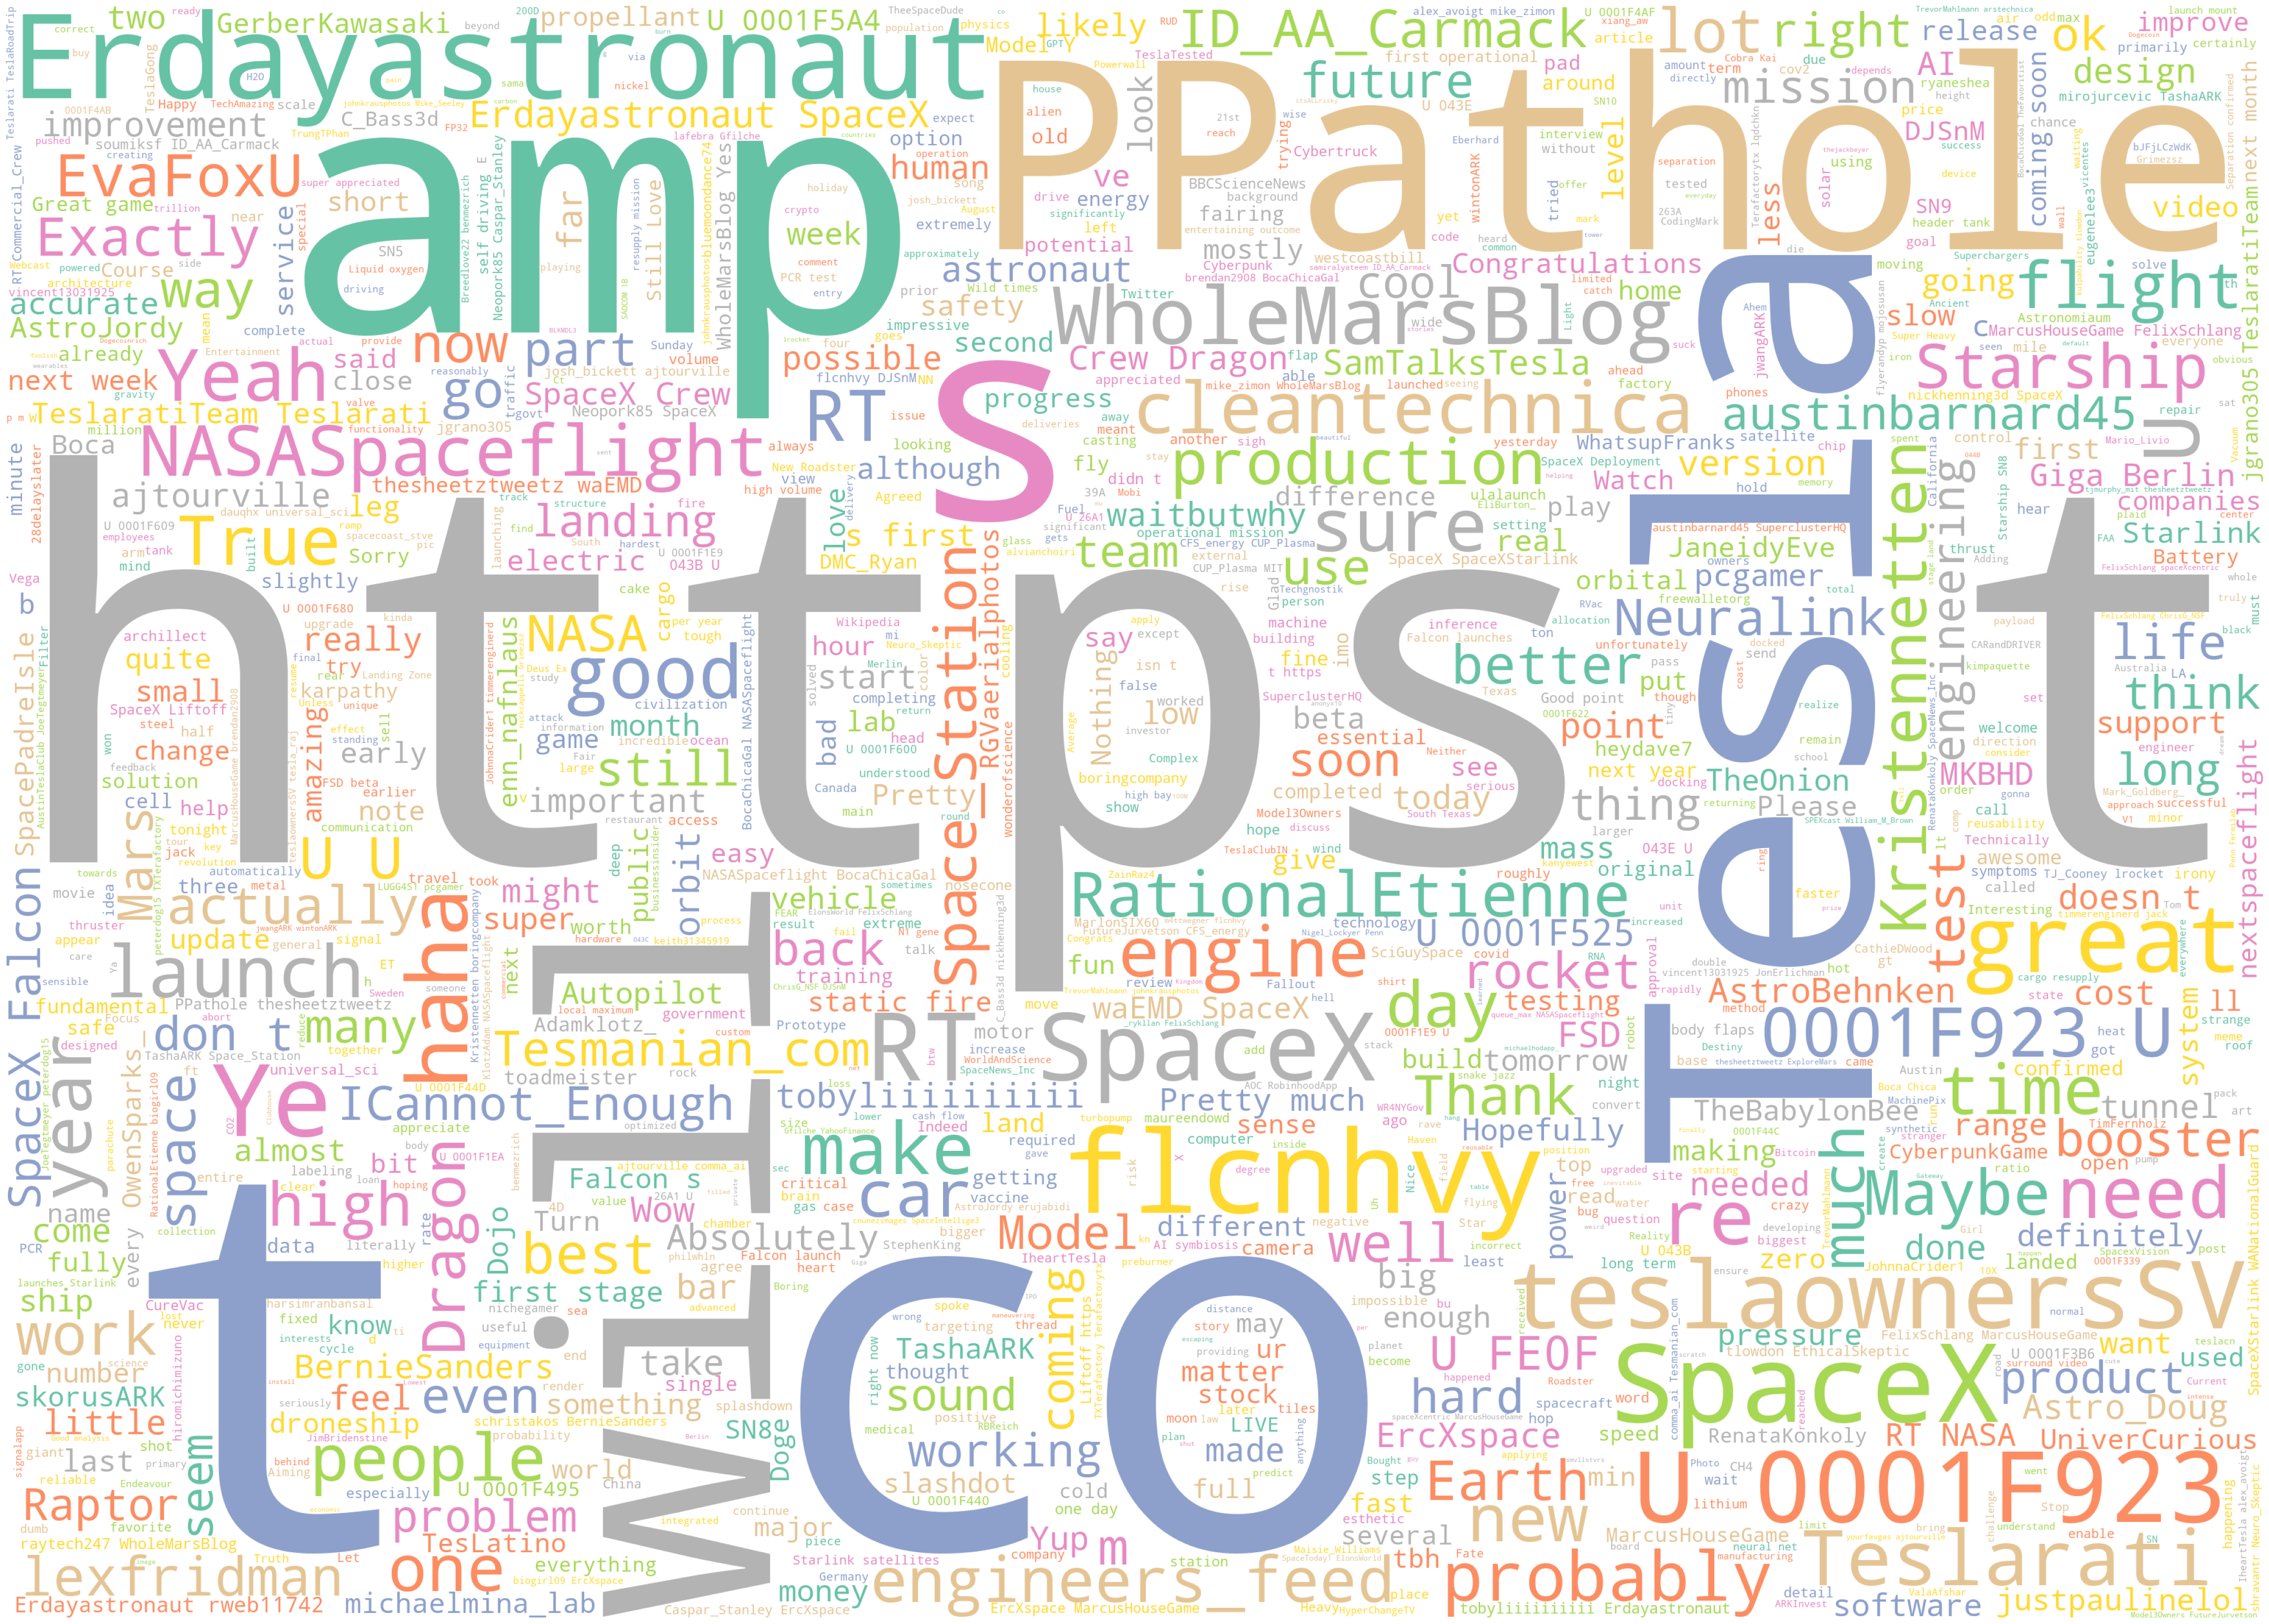

In [109]:
wordcloud = WordCloud(width = 3500, 
                      height = 2500,
                      background_color='white',
                      max_words=1200,
                      colormap='Set2').generate(text)
# Plot
plot_cloud(wordcloud)

In [110]:
musk2 = pd.read_csv('Elon_musk.csv', encoding='latin', error_bad_lines = False)
musk2

Unnamed: 0                                               Text
0              1                             @kunalb11 Im an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1994        1995  @flcnhvy True, it sounds so surreal, but the n...
1995        1996  @PPathole Make sure to read ur terms &amp; con...
1996        1997                @TeslaGong @PPathole Samwise Gamgee
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998        1999                          Progress update August 28

[1999 rows x 2 columns]

In [111]:
musk2 = musk2['Text']
musk2


0                                  @kunalb11 Im an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [112]:
musk2 = [x.strip() for x in musk2] # remove both the leading and the trailing characters
musk2 = [x for x in musk2 if x] # removes empty strings, because they are considered in Python as False
musk2[0:10]


['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [113]:
one_block = musk2[1]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)


In [114]:
one_block

'@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?'

In [115]:
for token in doc_block[:]:
    print(token, token.pos_)

@ID_AA_Carmack ADV
Ray PROPN
tracing VERB
on ADP
Cyberpunk PROPN
with ADP
HDR PROPN
is AUX
next ADJ
- PUNCT
level NOUN
. PUNCT
Have AUX
you PRON
tried VERB
it PRON
? PUNCT


In [116]:
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]


In [117]:
nouns_verbs


['tracing', 'level', 'tried']

In [118]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
X

<3x3 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [125]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd


# Create a CountVectorizer
vectorizer = CountVectorizer()

X.toarray()

# Fit and transform the data
X = vectorizer.fit_transform(nouns_verbs)

# Create a DataFrame with the feature names
temp_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Print the DataFrame
print(temp_df)


   level  tracing  tried
0      0        1      0
1      1        0      0
2      0        0      1


In [126]:
sum_words = X.sum(axis=0) #Column total
sum_words


matrix([[1, 1, 1]])

In [127]:
type(sum_words)


numpy.matrix

In [128]:
cv.vocabulary_


{'tracing': 1, 'level': 0, 'tried': 2}

In [129]:
sorted(cv.vocabulary_)


['level', 'tracing', 'tried']

In [137]:
wf_df = pd.DataFrame({'word' : vectorizer.get_feature_names_out(),
                      'count' : np.array(sum_words).flatten()})


In [138]:
wf_df

word  count
0    level      1
1  tracing      1
2    tried      1

<Axes: title={'center': 'Top verbs and nouns'}, xlabel='word'>

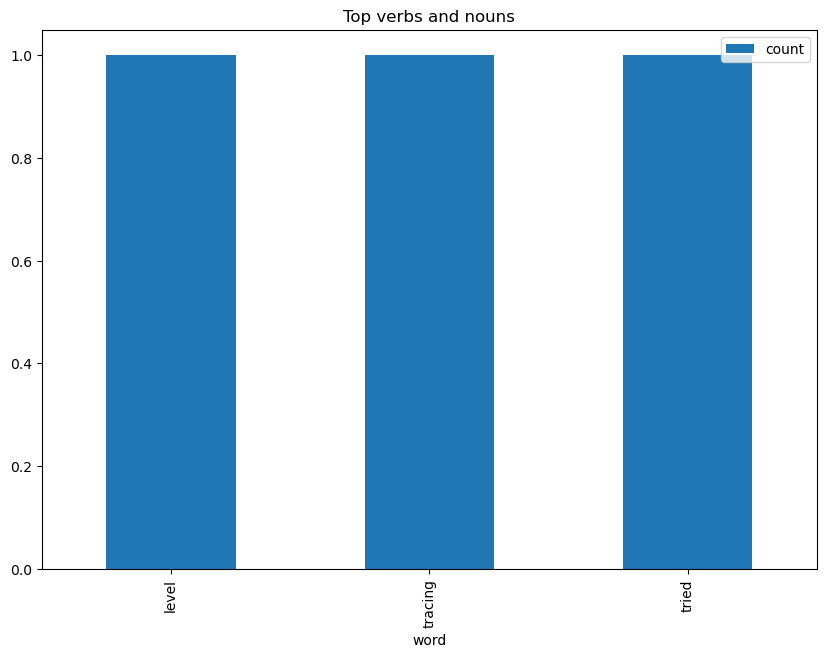

In [139]:
wf_df[0:15].plot.bar(x='word', figsize=(10,7), title='Top verbs and nouns')
